In [1]:
#равновесие Шт. - "прямая" веерная с учетом чтения коэф-тов из файла
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
# Рисовать графики сразу же
%matplotlib inline

#определяем функции  
 
def J0(u0, u1, u2, u3, z):
    return round(pc_B * u1 * u0 + pc_S * salary_st * (1 + z) ** (2*d) - (u1 ** z)/100, 3)
def J1(u0, u1, u2, u3, z):
    return round((u1 * (1 - pc_B) - outlay)* u0 - lam * (u1 ** lam_1), 3) 
def J2(u0, u1, u2, u3, z):
    return round(-u1 * u2 * u0 - salary_st * (1 + z) ** (2*d) + u1 * (1 - u2) * (1 - z) * k3 + profit * (k * z*z + b * z + c) 
                 + k1 *(1 + u2 * u2)**k2, 3)
def J3(u0, u1, u2, u3, z):
    return round((1 - pc_S) * salary_st * ((1 + z)**(2*d)) - u1 * (1 - u2) * (1 - z) * k3 
                 + k4 * (z**bet) * (T - u3)**(1 - bet), 3)
def z_current(u0, u1, u2, u3):
     return round(z0 + a * (u3 ** a1), 3)     
    
    
with open('coef_line.csv', 'r') as fp:
    reader = csv.reader(fp, delimiter=';')#, quotechar='"')
    # next(reader, None)  # skip the headers
    data = [row for row in reader]

n_data = ['цена анархии', 'значение показателя', 'J0_opt', 'J1_opt', 'J2_opt', 'J3_opt']
file_out = open('output.csv', 'w')
with file_out:
    writer = csv.writer(file_out)
    writer.writerow(n_data)
            
            
    #print(data)
    for i in range(1,len(data)): 
        #определяем массив входых параметров
    #    print(data[i])
    #    print(len(data[i])) #data[i][0] - номер строки
        u0_min = float(data[i][1])
        u0_max = float(data[i][2])
        u1_min = float(data[i][3])
        u1_max = float(data[i][4])
        u2_min = float(data[i][5])
        u2_max = float(data[i][6])
        u3_min = float(data[i][7]) 
        u3_max = float(data[i][8])
        T = float(data[i][9])
        N0 = int(data[i][10])
        N1 = int(data[i][11])
        N2 = int(data[i][12])
        N3 = int(data[i][13])
        z0 = float(data[i][14])
        z_abs = float(data[i][15])
        pc_B = float(data[i][16])
        pc_S = float(data[i][17])
        a = float(data[i][18])
        a1 = float(data[i][19])
        b = float(data[i][20])
        c = float(data[i][21])
        d = float(data[i][22])
        k = float(data[i][23])
        k1 = float(data[i][24])
        k2 = float(data[i][25])
        k3 = float(data[i][26])
        k4 = float(data[i][27])
        bet = float(data[i][28])
        lam = float(data[i][29])
        lam_1 = float(data[i][30])
        salary_st = float(data[i][31])
        outlay = float(data[i][32])
        profit = float(data[i][33])    
        #здесь запускаем Шт.

        h_u0 = round((u0_max - u0_min)/N0, 2)
        h_u1 = round((u1_max - u1_min)/N1, 2)
        h_u2 = round((u2_max - u2_min)/N2, 2)
        h_u3 = round((u3_max - u3_min)/N3, 2)

        def Shtackelberg_line ():
            print('шаги', h_u0, h_u1, h_u2, h_u3)
            qt = 0 #"номер комбинации управлений"

            J0_lst = []
            for i_u0 in range (0, N0+1):
                u0_cur = round(u0_min + i_u0 * h_u0,3)

                J1_lst = []
                for i_u1 in range (0, N1+1):
                    u1_cur = round(u1_min + i_u1 * h_u1,3)

                    J2_lst = []
                    for i_u2 in range (0, N2+1):
                        u2_cur = round(u2_min + i_u2 * h_u2,3)

                        J3_lst = []
                        for i_u3 in range (0, N3+1):
                            u3_cur = round(u3_min + i_u3 * h_u3,3)
                            print('текущий набор управлений', u0_cur, u1_cur, u2_cur, u3_cur)
                            qt += 1
                            J3_lst.append(round(J3(u0_cur, u1_cur, u2_cur, u3_cur, z_current(u0_cur, u1_cur, u2_cur, u3_cur)), 2))
                        J3_max = max(J3_lst)
                        u3_ind = round (J3_lst.index(J3_max) * h_u3 + u3_min, 2) #нашли управление при котором достигается максимум
                        print("значение показателя", z_current(u0_cur, u1_cur, u2_cur, u3_ind))
                        print('J3', J3_lst)
                        print('J3', max(J3_lst)) 

                        if z_current(u0_cur, u1_cur, u2_cur, u3_ind) > z_abs:
                            print("cool")
                            J2_lst.append(round(J2(u0_cur, u1_cur, u2_cur, u3_ind, z_current(u0_cur, u1_cur, u2_cur, u3_ind)), 2))
                            print("значение", z_current(u0_cur, u1_cur, u2_cur, u3_ind), 'при u3 =', u3_ind, 'при u2 =', round (J2_lst.index(max(J2_lst)) * h_u2 + u2_min, 2))
                        else:
                            print("fale") #если не выполняется уловие 4 мы должны поменять управление то есть просто переход не след.шаг цикла по Т
                            continue

                    print('J2', J2_lst)  
                    print('J2', max(J2_lst)) 
                    u2_ind = round (J2_lst.index(max(J2_lst)) * h_u2 + u2_min, 2)
                    #нет условия на z - тк уже только те, которые удовлетворяют этому условию
                    J1_lst.append(round(J1(u0_cur, u1_cur, u2_ind, u3_ind, z_current(u0_cur, u1_cur, u2_ind, u3_ind)), 2))

                print('J1', J1_lst)  
                print('J1', max(J1_lst)) 
                u1_ind = round (J1_lst.index(max(J1_lst)) * h_u1 + u1_min, 2)
                #нет условия на z - тк уже только те, которые удовлетворяют этому условию
                J0_lst.append(round(J0(u0_cur, u1_ind, u2_ind, u3_ind, z_current(u0_cur, u1_ind, u2_ind, u3_ind)), 2))

            print(J0_lst)  
            print("J0", max(J0_lst))
            u0_ind = round (J0_lst.index(max(J0_lst)) * h_u0 + u0_min, 2)
            print ('набор управлений:', u0_ind, u1_ind, u2_ind, u3_ind)
            print('**************************************')

            print('число возможных наборов управлений',qt)
            z_fin = z_current(u0_ind, u1_ind, u2_ind, u3_ind) 
            J0_max_opt = round(J0(u0_max, u1_max, u2_max, u3_max, 1), 2)      
            price_a =  round(max(J0_lst)/J0_max_opt, 2)                                                  
            print ('J0_MAX', J0_max_opt, 'цена анархии', price_a)

            #запись результатов в файл для ДАННОГО набора коэффициентов

            #new_data = data
            #myData = [["first_name", "second_name", "Grade"],
            #          ['Alex', 'Brian', 'A'],
            #          ['Tom', 'Smith', 'B']]
            #n_data = [['цена анархии', 'значение показателя', 'J0_opt'], [1, 0.9, 1000], [0.1, 333, 2333]]
            #file_out = open('output.csv', 'w')
            #with file_out:
                
            
            writer.writerow([price_a, z_fin, max(J0_lst),  max(J1_lst),  max(J2_lst),  max(J3_lst)])
            print("Writing complete")
            print("############################################")


        Shtackelberg_line ()    








шаги 0.3 2333.33 0.17 0.3
текущий набор управлений 0.1 3000.0 0.1 0.1
текущий набор управлений 0.1 3000.0 0.1 0.4
текущий набор управлений 0.1 3000.0 0.1 0.7
текущий набор управлений 0.1 3000.0 0.1 1.0
значение показателя 1.0
J3 [7948.29, 15633.64, 24586.91, 34800.0]
J3 34800.0
cool
значение 1.0 при u3 = 1.0 при u2 = 0.1
текущий набор управлений 0.1 3000.0 0.27 0.1
текущий набор управлений 0.1 3000.0 0.27 0.4
текущий набор управлений 0.1 3000.0 0.27 0.7
текущий набор управлений 0.1 3000.0 0.27 1.0
значение показателя 1.0
J3 [8774.49, 16184.44, 24862.31, 34800.0]
J3 34800.0
cool
значение 1.0 при u3 = 1.0 при u2 = 0.1
текущий набор управлений 0.1 3000.0 0.44 0.1
текущий набор управлений 0.1 3000.0 0.44 0.4
текущий набор управлений 0.1 3000.0 0.44 0.7
текущий набор управлений 0.1 3000.0 0.44 1.0
значение показателя 1.0
J3 [9600.69, 16735.24, 25137.71, 34800.0]
J3 34800.0
cool
значение 1.0 при u3 = 1.0 при u2 = 0.1
текущий набор управлений 0.1 3000.0 0.61 0.1
текущий набор управлений 0.1 3

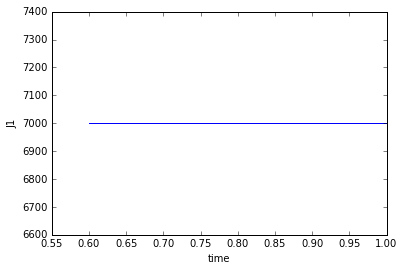

In [2]:
#вывод результатов
bet_lst = [0.6, 0.7, 0.8, 0.9, 1]


with open('output.csv', 'r') as pl:
    reader = csv.reader(pl, delimiter=';')#, quotechar='"')
    # next(reader, None)  # skip the headers
    data_out = [row for row in reader]
    
#print(data_out)

p_an = pd.Series([0.78, 0.83, 0.88, 0.95, 1])
z_fr = pd.Series([0.649, 0.73, 0.811, 0.919, 1])
J0_fr = pd.Series([5531.02, 5882.45, 6246.1, 6739.9, 7100.0])
J1_fr = pd.Series([6999.74, 6999.74, 6999.74, 6999.74, 6999.74])
J2_fr = pd.Series([185148.12, 200223.04, 216478.93, 239990.53, 259002.04])
J3_fr = pd.Series([23663.22, 26044.91, 28540.66, 32045.56, 34800.0])

data_print = {'верхняя граница управления студента': bet_lst, 'коэффициент согласованности': p_an,'значение показателя': z_fr,
              'J0': J0_fr, 'J1': J1_fr, 'J2': J2_fr, 'J3': J3_fr } 
df = pd.DataFrame(data_print)
df

plt.xlabel('time')
plt.ylabel('J1')
#plt.plot(bet_lst, z_fr)
#plt.plot(bet_lst, J0_fr)
plt.plot(bet_lst, J1_fr)
#plt.plot(bet_lst, J2_fr)
#plt.plot(bet_lst, J3_fr)


In [3]:

df = pd.DataFrame(data_print)
df


,J0,J1,J2,J3,верхняя граница управления студента,значение показателя,коэффициент согласованности
0,5531.02,6999.74,185148.12,23663.22,0.6,0.649,0.78
1,5882.45,6999.74,200223.04,26044.91,0.7,0.730,0.83
2,6246.10,6999.74,216478.93,28540.66,0.8,0.811,0.88
3,6739.90,6999.74,239990.53,32045.56,0.9,0.919,0.95
4,7100.00,6999.74,259002.04,34800.00,1.0,1.000,1.00


In [4]:
data_out

[['цена анархии,значение показателя,J0_opt,J1_opt,J2_opt,J3_opt'],
 [],
 ['1.0,1.0,7100.0,6999.74,259002.04,34800.0'],
 [],
 ['1.0,1.0,7100.0,6999.74,259002.04,34800.0'],
 [],
 ['1.0,1.0,7100.0,6999.74,259002.04,34800.0'],
 [],
 ['1.0,1.0,7100.0,6999.74,259002.04,34800.0'],
 [],
 ['1.0,1.0,7100.0,6999.74,259002.04,34800.0'],
 []]